<img src="https://www.virtualeducationexpo.ie/wp-content/uploads/2020/08/CCT_Logo_New_Aug_17.jpg" width="400">

# <center> *CA 2 Stats*<center>

       
## <center>Student: Marilia Meneses da Silva <center>
### <center>*Corporate Flights*<center>
    
<img src = "https://media.product.which.co.uk/prod/images/original/gm-b431db58-9b9f-4e85-a330-e62acb01423c-main-3-18.jpeg" width="300">
    
 

## Introduction
I pick a data set about corporate travels. As my background is in accounting, it would be interesting to analyse the expenses of corporate flights.

The dataset analysed in this report simulate real corporate travel systems focusing on flights and hotels. It was provided by Argo Solutions available on Kaggle website and contains 271888 observations and 10 variables whereas amongst them there are 6 qualitative variables and 3 quantitative variables and one date.

Data dictionary:
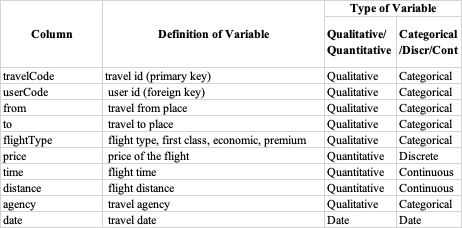



### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
import math
import datetime
from numpy.random import randn

from sklearn.model_selection import train_test_split

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Measurement libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#reading the data
df = pd.read_csv("flights.csv")
df

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


### Getting relevant information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [4]:
#how many variables and observations are in the data
df.shape

(271888, 10)

In [5]:
#dropping some irrelevant data
df = df.drop(columns=['travelCode', 'userCode'])
df.head()

,from,to,flightType,price,time,distance,agency,date
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [6]:
df['from'].value_counts()

Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: from, dtype: int64

In [7]:
df['from'].nunique()

9

In [8]:
df['to'].nunique()

9

In [9]:
df['to'].value_counts()

Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: to, dtype: int64

### Encoding

Enconding variables *'From'* and *'To'* using label encoder to avoid sparse data: 

In [10]:

le = LabelEncoder()
le.fit_transform(df['from'])
le.fit_transform(df['to'])

array([3, 5, 3, ..., 3, 6, 3])

In [11]:
df['From_Encoded'] = le.transform(df['from'])

In [12]:
df['to_Encoded'] = le.transform(df['to'])
df.head()

,from,to,flightType,price,time,distance,agency,date,From_Encoded,to_Encoded
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,5,3
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,3,5
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,1,3
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,3,1
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,0,7


Encoding variables 

In [13]:
enc = OrdinalEncoder()
enc.fit(df[["flightType","agency"]])
df[["flightType","agency"]] = enc.transform(df[["flightType","agency"]])

### Descriptive Statistics

In [14]:
#obtaining the distribution of variables, including mean, median, min, max, and the different quartiles:
df.describe()

,flightType,price,time,distance,agency,From_Encoded,to_Encoded
count,271888.000000,271888.00000,271888.000000,271888.000000,271888.000000,271888.000000,271888.000000
mean,1.001979,957.37503,1.421147,546.955535,1.001376,3.418422,3.418422
std,0.756184,362.31189,0.542541,208.851288,0.925986,2.430872,2.430872
min,0.000000,301.51000,0.440000,168.220000,0.000000,0.000000,0.000000
25%,0.000000,672.66000,1.040000,401.660000,0.000000,1.000000,1.000000
50%,1.000000,904.00000,1.460000,562.140000,1.000000,3.000000,3.000000
75%,2.000000,1222.24000,1.760000,676.530000,2.000000,5.000000,5.000000
max,2.000000,1754.17000,2.440000,937.770000,2.000000,8.000000,8.000000


In [15]:
# including object variables
df.describe(include=['object'])

,from,to,date
count,271888,271888,271888
unique,9,9,999
top,Florianopolis (SC),Florianopolis (SC),09/26/2019
freq,57317,57317,1335


In [16]:
#Checking for the null values 
df.isnull().sum()

from            0
to              0
flightType      0
price           0
time            0
distance        0
agency          0
date            0
From_Encoded    0
to_Encoded      0
dtype: int64

No Missing values in the dataset

### Central tendency measures

In [17]:
#calculating mean, median and mode of the variable price
df_price = pd.read_csv("flights.csv",usecols=['price'])
df_price.mean()

price    957.37503
dtype: float64

In [18]:
df_price.median()

price    904.0
dtype: float64

In [19]:
df_price.mode()

,price
0,1132.81
1,1248.70
2,1499.93
3,1574.28


<AxesSubplot:xlabel='price', ylabel='Density'>

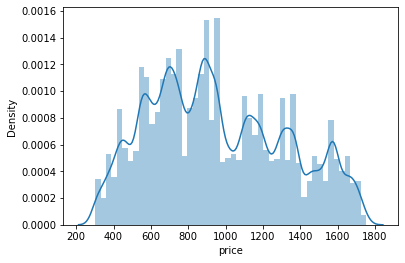

In [20]:
#plotting a histogram to visualize the distribution of the variable 'price'.
sns.distplot(df['price'])

In [21]:
#calculating the mode of the FlyghtType
df['flightType'].value_counts()

1.0    116418
2.0     78004
0.0     77466
Name: flightType, dtype: int64

In [22]:
df_type = df['flightType']
df_type

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
271883    1.0
271884    0.0
271885    0.0
271886    0.0
271887    0.0
Name: flightType, Length: 271888, dtype: float64

<AxesSubplot:>

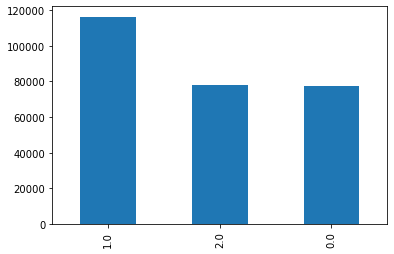

In [23]:
#plotting a bar chart to visualize the frequency of 'flightType'
df['flightType'].value_counts().plot(kind='bar')

### Mesures of dispersion

In [24]:
#calculating the range of variable price:
range = (1754.17000 - 301.51000)
print(range)

1452.66


In [25]:
#calculating the variance of price: 
df["price"].var()

131269.9056039013

In [26]:
standard_deviation = df['price'].std()
print(standard_deviation)

362.3118899565695


In [27]:
df.columns

Index(['from', 'to', 'flightType', 'price', 'time', 'distance', 'agency',
       'date', 'From_Encoded', 'to_Encoded'],
      dtype='object')

In [28]:
def boxp(b,c,col,ax):                                            # Creating function to plot boxplots
    ax=ax[b][c]                                                  # Ax where the graph will be plotted
    sns.boxplot(x=col, data=df, ax=ax, color= "teal")            # Boxplot plot according to column
    ax.set_xlabel('')                                            # Defining x-label
    ax.set_ylabel('')                                            # Defining y-label
    ax.set_title(col, fontweight="bold")                         # Setting title to each plot based on column
    plt.tight_layout()                                           # Organise all the plots

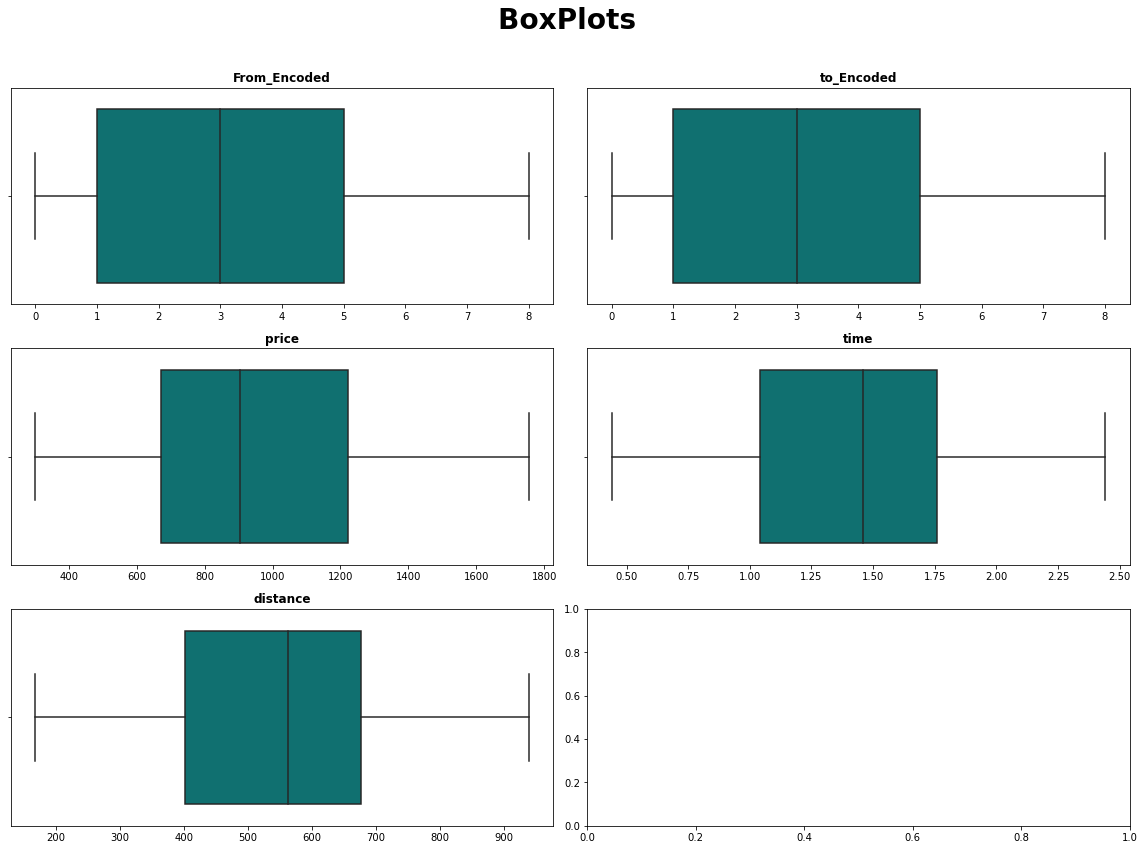

In [29]:
fig, ax = plt.subplots(3,2, figsize=(16,12))                   # Stablishing size of the figure and how many axes
fig.suptitle('BoxPlots \n', fontsize=28, fontweight='bold')    # Plot a general title

# Plotting each column in a ax

boxp(0,0,'From_Encoded',ax)
boxp(0,1,'to_Encoded',ax)
boxp(1,0,'price',ax)
boxp(1,1,'time',ax)
boxp(2,0,'distance',ax)


In [30]:
#calculating the skewness
df["price"].skew()

0.3135775686612531

In [31]:
#calculating the range of variable distance:
range = (937.770000 - 168.220000)
print(range)

769.55


In [32]:
#calculating the variance of distance: 
df["distance"].var()

43618.86055070666

In [33]:
#calculating the standard deviation of distance: 
standard_deviation = df['distance'].std()
print(standard_deviation)

208.8512881231683


<AxesSubplot:xlabel='distance'>

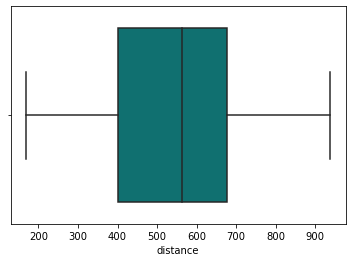

In [34]:
sns.boxplot(x=df['distance'], color = 'teal') 

In [35]:
Q1 = df["price"].quantile(0.25)
print(Q1)

672.66


In [36]:
Q2 = df["price"].quantile(0.5)
print(Q2)

904.0


In [37]:
Q3 = df["price"].quantile(0.75)
print(Q3)

1222.24


In [38]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
print(IQR) 

549.58


In [39]:
df["price"].describe()

count    271888.00000
mean        957.37503
std         362.31189
min         301.51000
25%         672.66000
50%         904.00000
75%        1222.24000
max        1754.17000
Name: price, dtype: float64

<AxesSubplot:xlabel='distance', ylabel='price'>

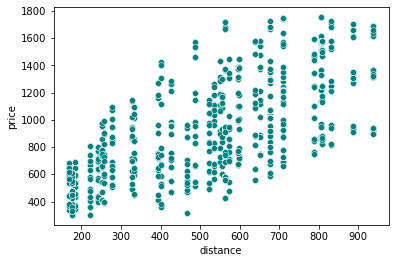

In [40]:
sns.scatterplot(data=df, x="distance", y="price", color = 'teal')

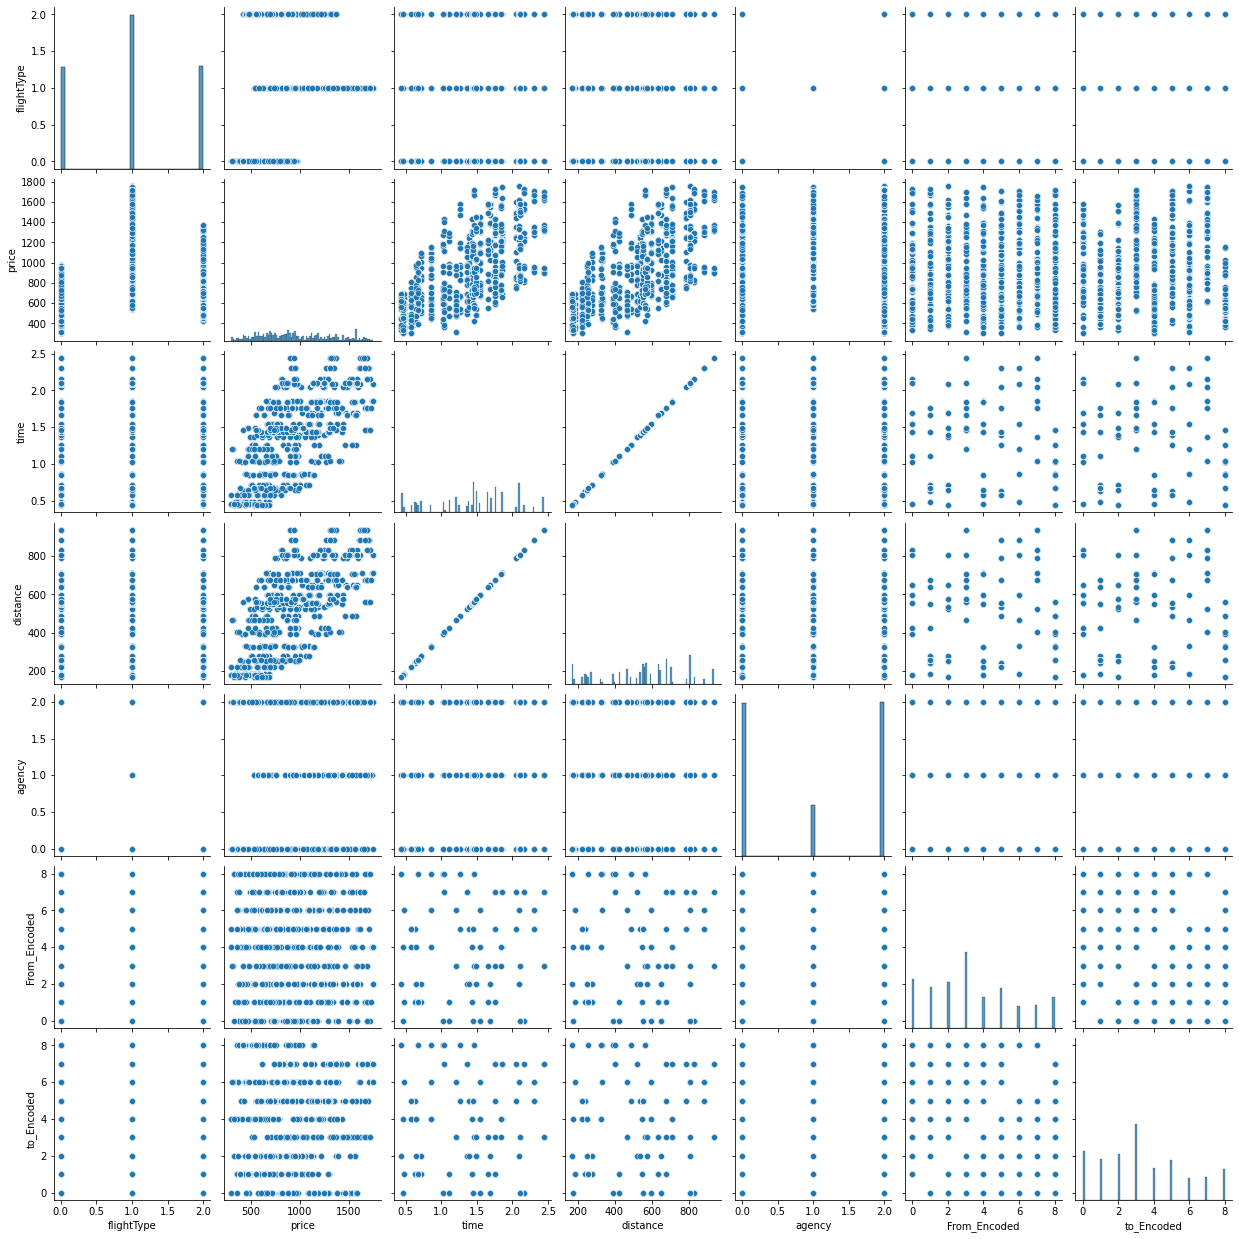

In [41]:
colors = ["teal"]
sns.pairplot(df, palette=colors)

In [42]:
# checking null values
df.isnull().any()

from            False
to              False
flightType      False
price           False
time            False
distance        False
agency          False
date            False
From_Encoded    False
to_Encoded      False
dtype: bool

In [43]:
print(df.isnull().sum()) 

from            0
to              0
flightType      0
price           0
time            0
distance        0
agency          0
date            0
From_Encoded    0
to_Encoded      0
dtype: int64


In [44]:
#calculating mean, median and mode of the variable distance
df_distance = pd.read_csv("flights.csv",usecols=['distance'])
df_distance.mean()

distance    546.955535
dtype: float64

In [45]:
df_distance.median()

distance    562.14
dtype: float64

In [46]:
df_distance.mode()

,distance
0,808.85


In [47]:
df_column_from = df['from']

In [48]:
df['from'].value_counts()

Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: from, dtype: int64

<AxesSubplot:>

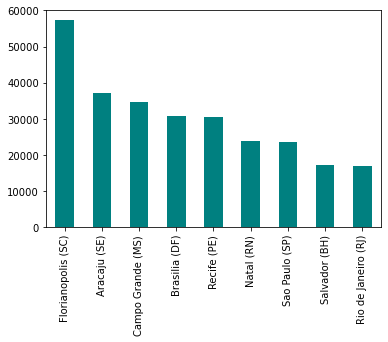

In [49]:
df_column_from.value_counts().plot(kind='bar', color= 'teal')

In [50]:
#calculating the skewness
df["distance"].skew()

-0.1839441974642272

### Treating the variable Date

In [51]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,from,to,flightType,price,time,distance,agency,date,From_Encoded,to_Encoded
0,Recife (PE),Florianopolis (SC),1.0,1434.38,1.76,676.53,1.0,2019-09-26,5,3
1,Florianopolis (SC),Recife (PE),1.0,1292.29,1.76,676.53,1.0,2019-09-30,3,5
2,Brasilia (DF),Florianopolis (SC),1.0,1487.52,1.66,637.56,0.0,2019-10-03,1,3
3,Florianopolis (SC),Brasilia (DF),1.0,1127.36,1.66,637.56,0.0,2019-10-04,3,1
4,Aracaju (SE),Salvador (BH),1.0,1684.05,2.16,830.86,0.0,2019-10-10,0,7


### Selecting the sample from the data set

In [52]:
filtered_df =df.loc[df["date"].between('2019-10-01', '2019-10-31')]
print(filtered_df)

                      from                  to  flightType    price  time  \
2            Brasilia (DF)  Florianopolis (SC)         1.0  1487.52  1.66   
3       Florianopolis (SC)       Brasilia (DF)         1.0  1127.36  1.66   
4             Aracaju (SE)       Salvador (BH)         1.0  1684.05  2.16   
5            Salvador (BH)        Aracaju (SE)         1.0  1531.92  2.16   
6             Aracaju (SE)   Campo Grande (MS)         0.0   743.54  1.69   
...                    ...                 ...         ...      ...   ...   
271806  Florianopolis (SC)       Salvador (BH)         0.0   898.67  2.44   
271807       Salvador (BH)  Florianopolis (SC)         0.0   943.15  2.44   
271808  Florianopolis (SC)       Salvador (BH)         0.0   898.67  2.44   
271809       Salvador (BH)  Florianopolis (SC)         0.0   943.15  2.44   
271810  Florianopolis (SC)      Sao Paulo (SP)         0.0   427.00  1.46   

        distance  agency       date  From_Encoded  to_Encoded  
2         6

# CA2

## First Section

### Hypoteses Test

Acording to ANAC (The National Civil Aviation Agency) the average price of airline tickets in Brazil in October of 2019 was 543.41. On calculating the avarage of the price on the same period, of 30 observations from the data set, the average turns out to be 944.93.

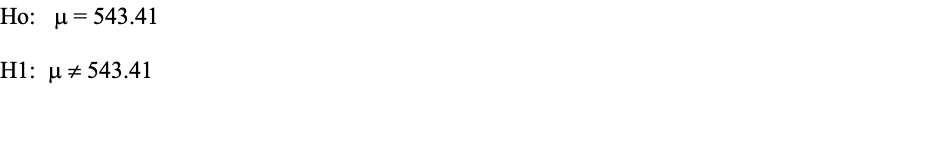

In [53]:
#taking a sample of 29 observations from the data set, on the period of October,2019:

october= (df['date'] > '2019-10-01') & (df['date'] <= '2019-10-31')
filtered_df=df.loc[october]
sample = filtered_df.sample(29,random_state=1)
sample['price'].head()

187960     857.32
192230     544.86
156148     744.11
81727     1087.18
64651      638.63
Name: price, dtype: float64

### T - test

First of all, we use t-test when the standard deviation of the population is unknown. (Lakin, 2011, pp.211) Since I do not have the standard deviation of the population, I will take a random sample of 29 observations from the data set to perform a t-test in this case, having the population mean represented by μ, the sample mean represented by x̄, and the standard deviation of sample represented by S.

In [54]:
# mean of sample: 
x̄ = sample['price'].mean()
print(x̄)

936.2068965517242


In [55]:
#std of sample: 
S = sample['price'].std()
print(S)

337.2438783951825


In [56]:
dif_means = x̄ - 543.41
print(dif_means)

392.7968965517242


In [57]:
#stabilhing the values: 

sd = S/math.sqrt(29)
alpha =0.05
null_mean =543.41
data = sample['price']

# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))

mean=936.21 stdv=331.38


Now, I will perform the test. In this function, I passed data, in value parameter. I passed mean value in the null hypothesis, in alternative hypothesis I checked whether the mean of the distribution of the sample is different than the population mean using parameter 'two-sided'. (docs.scipy.org, n.d.)

In [58]:
#Now, I will perform the test:
ttest_Score, p_value= stats.ttest_1samp(data, null_mean, alternative='two-sided') # stablishing 'two-sided'


#Printting the results:
print('\033[1m'+'t-test Score:'+'\033[0m'+'%.4f' % (np.array(ttest_Score)))
print('\033[1m'+'p-value:'+'\033[0m'+'%.10f'% (np.array(p_value)))

t-test Score:6.2722
p-value:0.0000008825


If the p-value we obteined is less than the selected alpha level, 0.05 in this case, I will reject the null hypothesis. If the p-value is greather than the alpha value, I will fail to reject the null hypothesis. It's important to note that the null hypothesis is never accepted; we can only reject or fail to reject it. 

In [59]:
# We compare the p-value with alpha, if it is greater than alpha then we do not reject null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print('\033[1m'+"Reject Null Hypothesis"+'\033[0m')
else:
  print(+'\033[0m'+"Fail to Reject NUll Hypothesis"+'\033[0m')

Reject Null Hypothesis


## Second Section

### Correlation Analysis

**What is correlation?**

According to Haslwanter (2016, p.184) The coefficient correlation tell us if two variables are related or not and if there is a relationship between them. Which means, if one variable changes, the other also changes. 
Correlation can occurs either when one variable depends on the value of another variable or two variables could depend on a third variable. 
A correlation can be positive, when both variables move in the same direction or negative, when one variable’s values moves up, the values of another variables moves down. (Brownlee, 2019)

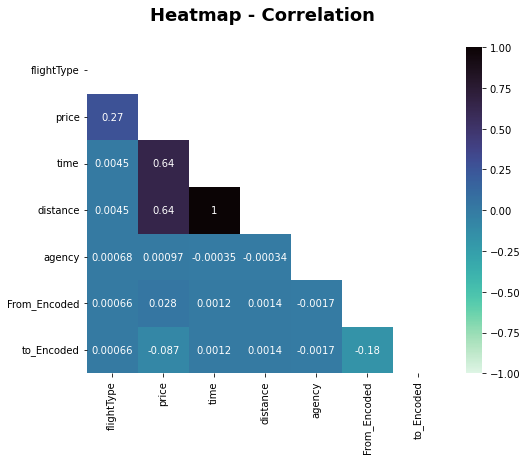

In [60]:
fig, ax = plt.subplots(figsize=(8,6))            # Stablishing size of figure and how many axes 

corr = df.corr()                              # Creating correlation matrix and storing in corr
mask = np.triu(corr)                           # Creating a variable to display only the lower triangle of the plot
palette=plt.get_cmap('mako').reversed()        # Choosing palette and reversing it
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, mask=mask, ax=ax, cmap=palette) # Plotting heatmap

ax.set_title('Heatmap - Correlation \n', fontsize=18, fontweight='bold');  # Setting title

The heatmap above shows that there are a few variables with moderate correlation, others with very low correlation and others with almost no correlation. This information will be used to perform Linear Regression in two variables in the next topic.

### Linear Regression for Statistics¶

As informed previously, the heatmap showed how strong is the correlation among variables. The variables Price and distance were chosen. Applying the correlation function, the result is 0.64, which means there is a moderate correlation between these two variables. It is clear, by looking at the scatterplot below, that there is a pattern between the variables.

In [61]:
# Correlation matrix for variables chosen
df[['price', 'distance']].corr(method='pearson')

,price,distance
price,1.000000,0.641915
distance,0.641915,1.000000


Text(0.5, 1.0, 'Correlation between Price and Distance')

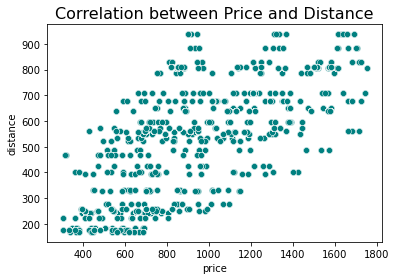

In [62]:
# Use variables chosen to plot scatterplot

sns.scatterplot(data=df, x="price", y="distance", color= 'teal');
plt.title("Correlation between Price and Distance", fontsize = 16)

To understand this pattern, it was performed a n.polyfit with degree one to get the coeficients of the linear equation that reflects the correlation between Price and distance.

In [63]:
flight_fit = np.polyfit(df.price, df.distance, 1)

flight_fit

array([  0.37002606, 192.70182343])

After performing that, the coefficients calculated were a=0.37 and b= 192.70. Using these values, it is possible to create the Linear Regression Model: 

y = 0.37x + 192.70.

price: x

distance: y

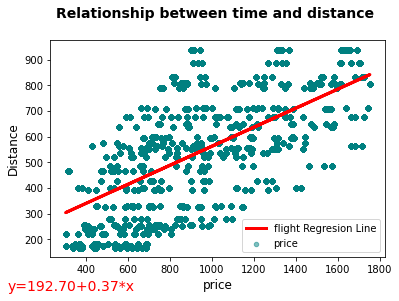

In [64]:
# Plotting the scatter plot
df.plot(kind='scatter', x='price', y='distance', color='teal', alpha=0.5)

# Plotting Regression Line
plt.plot(df.price, flight_fit[0] * df.price + flight_fit[1], color='red', linewidth=3)

# Plotting Regression Equation
plt.text(25, 0,'y={:.2f}+{:.2f}*x'.format(flight_fit[1],  flight_fit[0]), color='red', fontsize=14)

# legend, title and labels.
plt.legend(labels=['flight Regresion Line', 'price', 'distance'])
plt.title('Relationship between time and distance \n', fontsize=14, fontweight='bold')
plt.xlabel('price', fontsize=12)
plt.ylabel('Distance', fontsize=12);

The method used above gave us the coefficients and the Linear Model. It is possible to perform prediction using it, but there is a library on python to do that. It will be performed below the Linear Regression using Scikit Learn.

The main objective of a model is to make predictions using new information applied to the model. To make prediction in a large dataset it is necessary to perform a test train split, so a part of the dataset can be used to compare values predicted with actual values. This way it is possible to get the accuracy of the model.


### Modeling

#### Linear Regression

In [73]:
# Defining variables X and y
X = df['price']
y = df['distance']

# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# While performing I got an error telling me to reshape the variables, so I reshaped all of them
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Checking the coefficients
print('\033[1m'+'b: '+'\033[0m', lr_reg.intercept_)
print('\033[1m'+'a: '+'\033[0m', lr_reg.coef_)

b:  [193.29684217]
a:  [[0.36945618]]


In [74]:
lr_pred = lr_reg.predict(X_test)                    # Using Linear Regression to predict values for X_test
R_square = r2_score(y_test, lr_pred)                 # Compare actual values to predicted values
print('\033[1m'+'Coefficient of Determination: '+'\033[0m'+'{:.4f}'.format(R_square))

Coefficient of Determination: 0.4156


Performing Linear Regression using Scikit Learn showed very similar values for the coefficients. The Coefficient of Determination is 0.4146 (41.46%), which means that 41.46% of Total Sum of Squares is mantained by using this predictive model.

Multiple Linear Regression

In [67]:
#df= df.drop(df[['date', 'from', 'to']], axis=1)
#df.head()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   from          271888 non-null  object        
 1   to            271888 non-null  object        
 2   flightType    271888 non-null  float64       
 3   price         271888 non-null  float64       
 4   time          271888 non-null  float64       
 5   distance      271888 non-null  float64       
 6   agency        271888 non-null  float64       
 7   date          271888 non-null  datetime64[ns]
 8   From_Encoded  271888 non-null  int64         
 9   to_Encoded    271888 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 20.7+ MB


In [69]:
X = df[['time', 'distance']].values.reshape(y.shape[0], -1)
y = df['price'].values.reshape(y.shape[0], -1)

In [70]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
# Applying the model

ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)
ln_pred = ln_reg.predict(X_test)

# Evaluation of the model

ln_train_accuracy = ln_reg.score(X_train, y_train)*100
ln_test_accuracy = ln_reg.score(X_test, y_test)*100

# Calculating Cross Validation
ln_reg_cross_validation = cross_val_score(ln_reg, X, y, cv=3).mean()*100

# Displaying the scores
print("Training set score :"+"{:.2f}%".format(ln_train_accuracy))
print("Test set score :"+"{:.2f}%".format(ln_test_accuracy))
print("Cross Validation :"+"{:.2f}%".format(ln_reg_cross_validation))

Training set score :41.27%
Test set score :41.25%
Cross Validation :38.50%
